<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/Hill_Climbing_Algorithms_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hill Climbing Algorithms
Hill climbing algorithms are iterative optimization algorithms that start with an arbitrary initial solution and attempt to find a better solution by incrementally making changes to the current solution. Different variants of hill climbing handle the selection and evaluation of neighboring nodes in various ways. Here, we will explore four different hill climbing algorithms: Simple Hill Climbing, Steepest-Ascent Hill Climbing, Stochastic Hill Climbing, and Random-Restart Hill Climbing.

## 1. Simple Hill Climbing

### Approach:
1. Start with an initial solution (current node).
2. Explore the neighbors of the current node one by one.
3. Evaluate each neighboring node:
   - If a neighboring node improves the objective function (i.e., it is better than the current solution), move to this neighboring node and make it the current node.
   - Otherwise, continue exploring the next neighbor.
4. Repeat steps 2-3 until no improvement is found or all neighbors have been examined.
5. Return the current node as the solution.

### Example:
Let's consider a simple optimization problem where the objective is to find the maximum value of the function $ f(x) = - (x-4)^2 + 10 $.

### Step-by-Step:
1. Start at $ x = 0 $.
2. Evaluate neighbors: $ x = 1 $, $ x = -1 $.
3. $ f(1) = - (1-4)^2 + 10 = 1 $, $ f(-1) = - (-1-4)^2 + 10 = -15 $. Move to $ x = 1 $.
4. Next neighbors: $ x = 2 $, $ x = 0 $.
5. $ f(2) = - (2-4)^2 + 10 = 6 $, $ f(0) = - (0-4)^2 + 10 = -6 $. Move to $ x = 2 $.
6. Continue this process until the maximum value is found at $ x = 4 $.



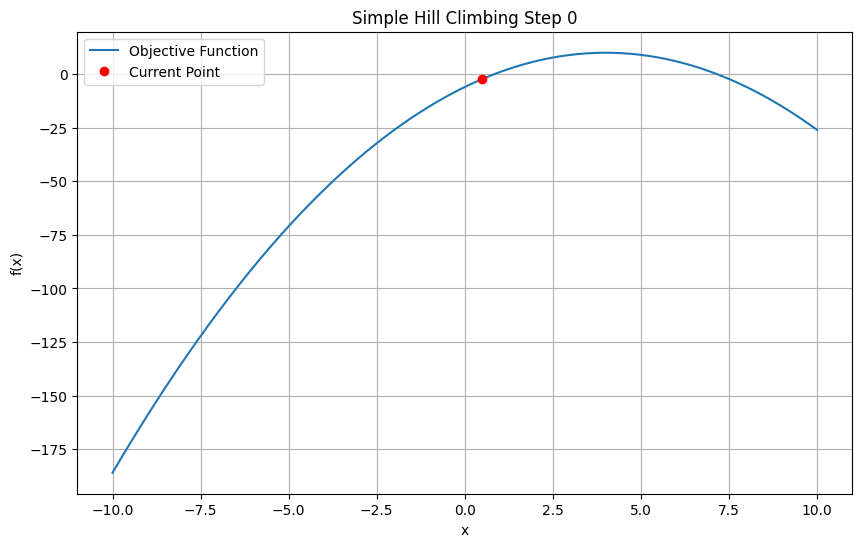

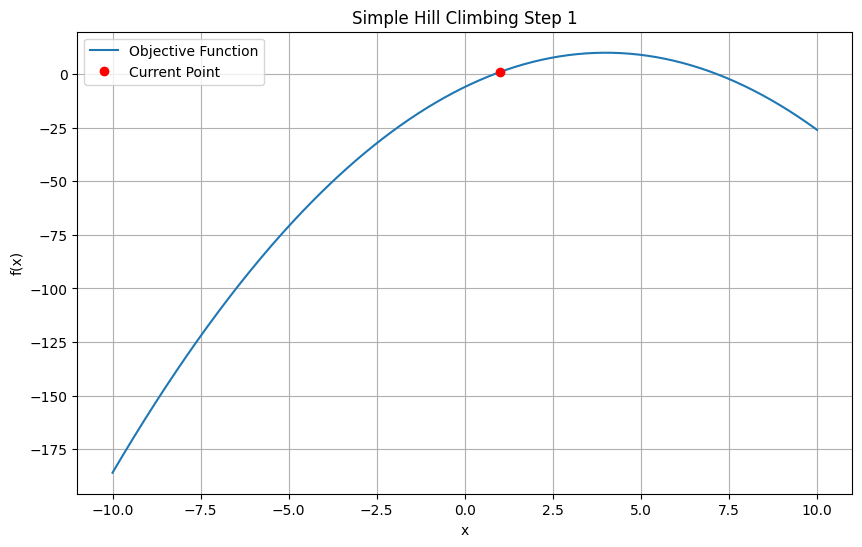

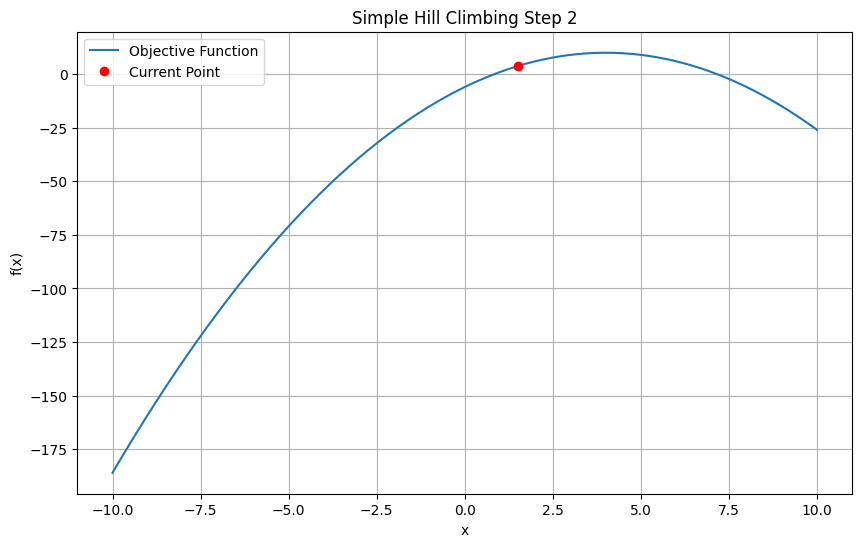

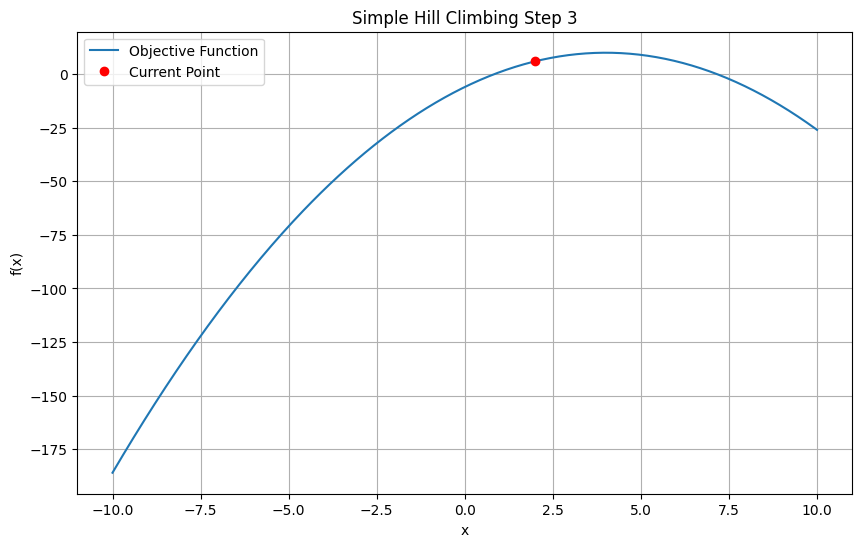

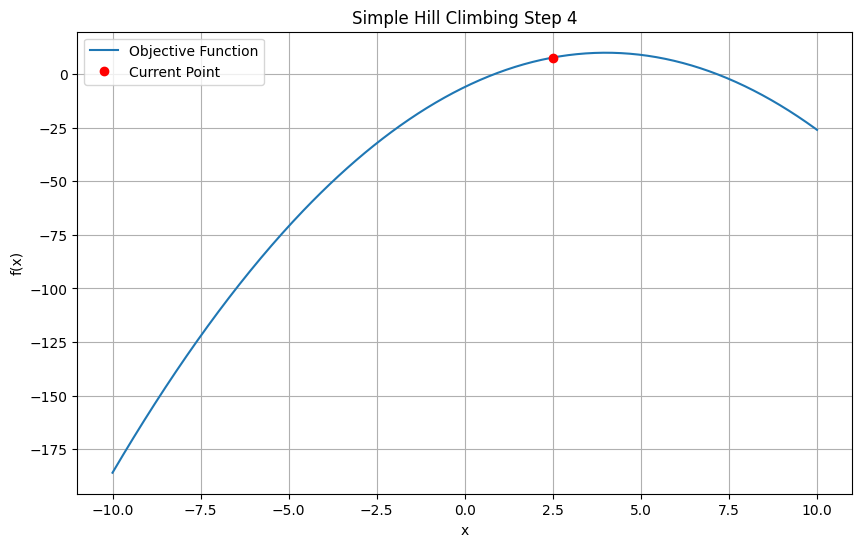

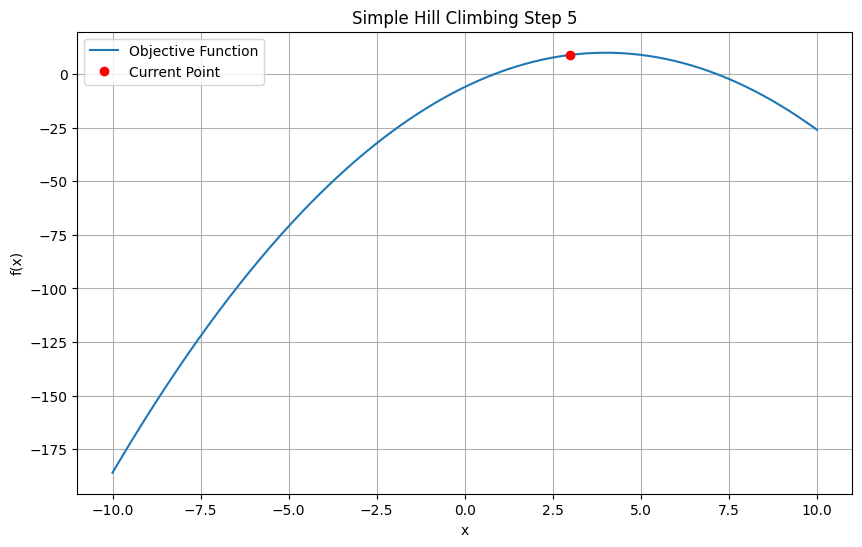

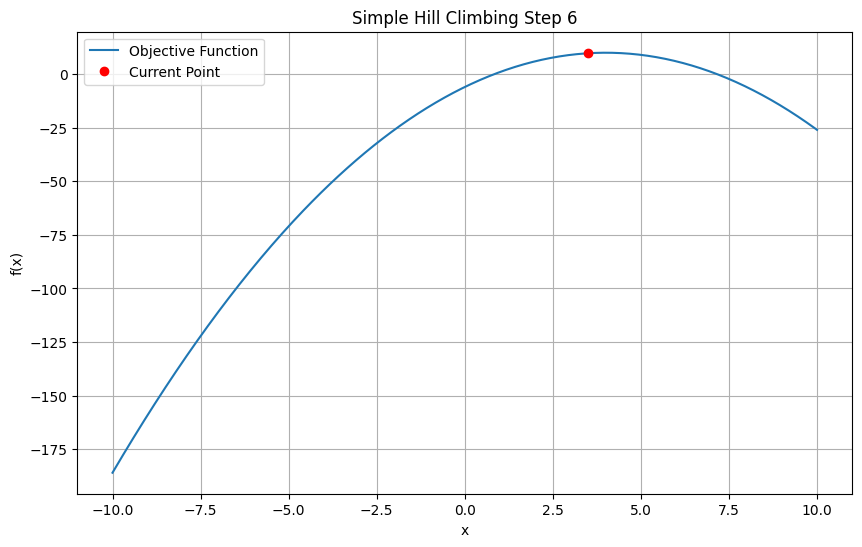

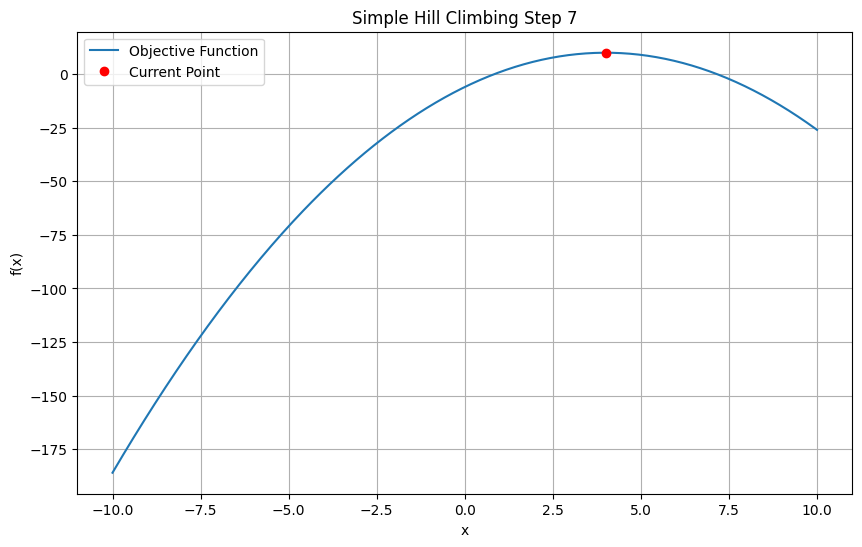

Steps taken by the Simple Hill Climbing algorithm: [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def objective_function(x):
    return -(x - 4)**2 + 10

# Simple Hill Climbing Algorithm
def simple_hill_climbing(init_x, step_size, max_iter):
    x = init_x
    points = [x]

    for iteration in range(max_iter):
        current_val = objective_function(x)
        next_x = x + step_size
        next_val = objective_function(next_x)

        if next_val > current_val:
            x = next_x
        else:
            next_x = x - step_size
            next_val = objective_function(next_x)
            if next_val > current_val:
                x = next_x
            else:
                break

        points.append(x)
        # Visualize the current step
        visualize_step(points, iteration)

    return points

# Visualization function
def visualize_step(points, iteration):
    x_vals = np.linspace(-10, 10, 400)
    y_vals = objective_function(x_vals)
    current_x = points[-1]
    current_y = objective_function(current_x)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Objective Function')
    plt.plot(current_x, current_y, 'ro', label='Current Point')
    plt.title(f'Simple Hill Climbing Step {iteration}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Initial parameters
init_x = 0
step_size = 0.5
max_iter = 100

# Running the Simple Hill Climbing algorithm
points = simple_hill_climbing(init_x, step_size, max_iter)
print("Steps taken by the Simple Hill Climbing algorithm:", points)

## 2. Steepest-Ascent Hill Climbing

### Approach:
1. Start with an initial solution (current node).
2. Evaluate all neighbors of the current node.
3. Select the best neighbor that maximizes (or minimizes) the objective function.
4. Move to the best neighboring node and make it the current node.
5. Repeat steps 2-4 until no improvement can be made (i.e., you reach a peak or valley).
6. Return the current node as the solution.

### Example:
Using the same function $ f(x) = - (x-4)^2 + 10 $.

### Step-by-Step:
1. Start at $ x = 0 $.
2. Evaluate neighbors: $ x = 1 $, $ x = -1 $.
3. $ f(1) = 1 $, $ f(-1) = -15 $. Move to $ x = 1 $.
4. Next neighbors: $ x = 2 $, $ x = 0 $.
5. $ f(2) = 6 $, $ f(0) = -6 $. Move to $ x = 2 $.
6. Continue this process, evaluating all neighbors at each step until reaching $ x = 4 $ where the function value $ f(4) = 10 $ is the maximum.


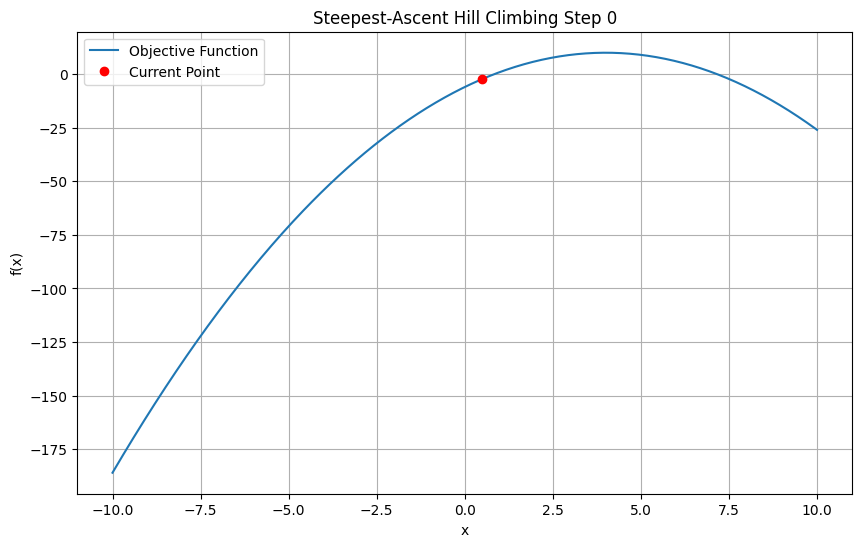

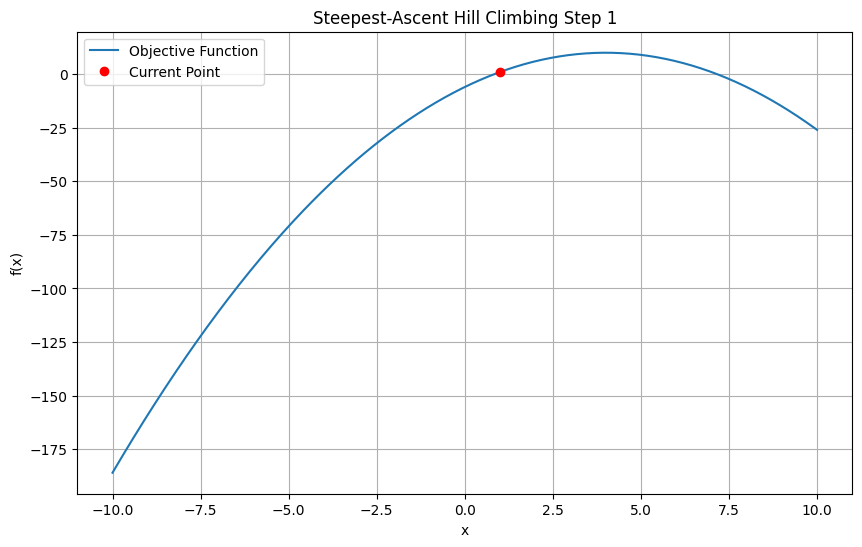

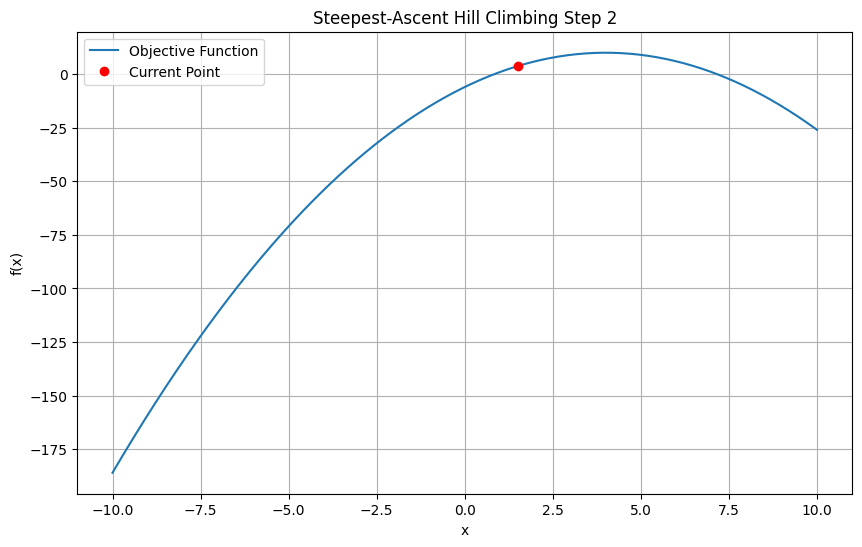

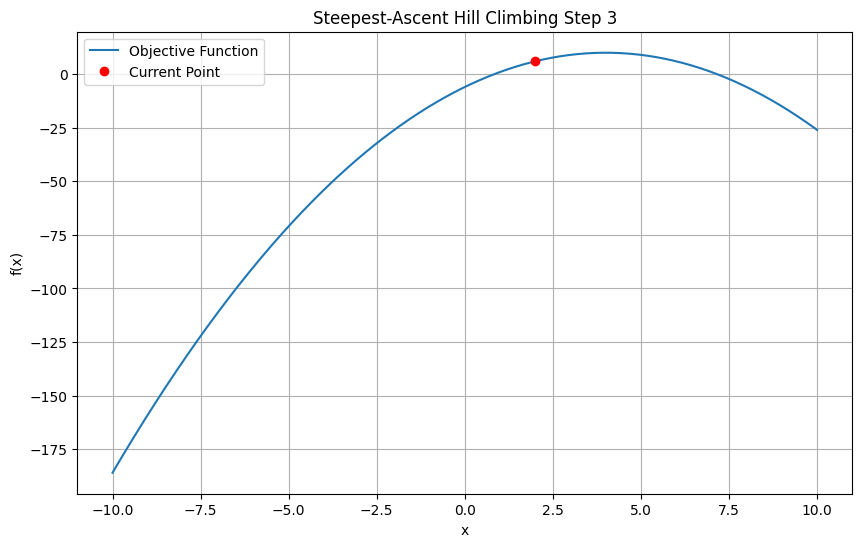

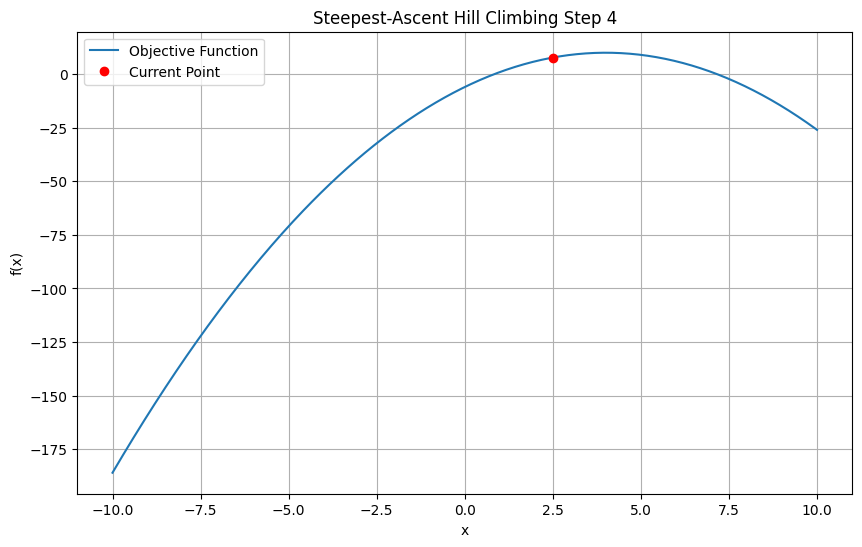

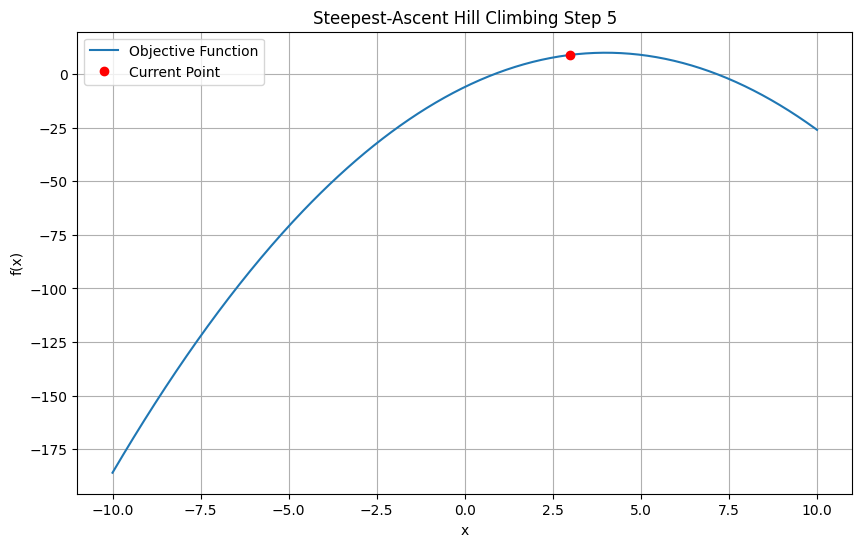

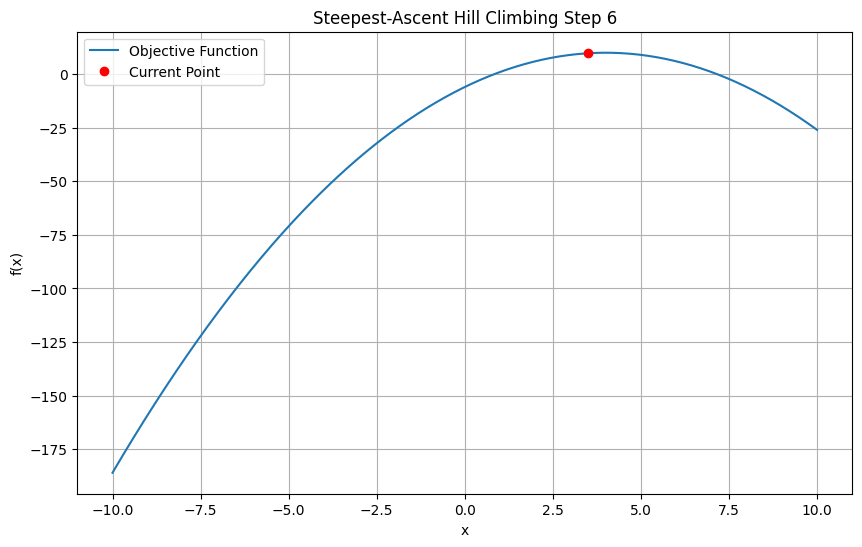

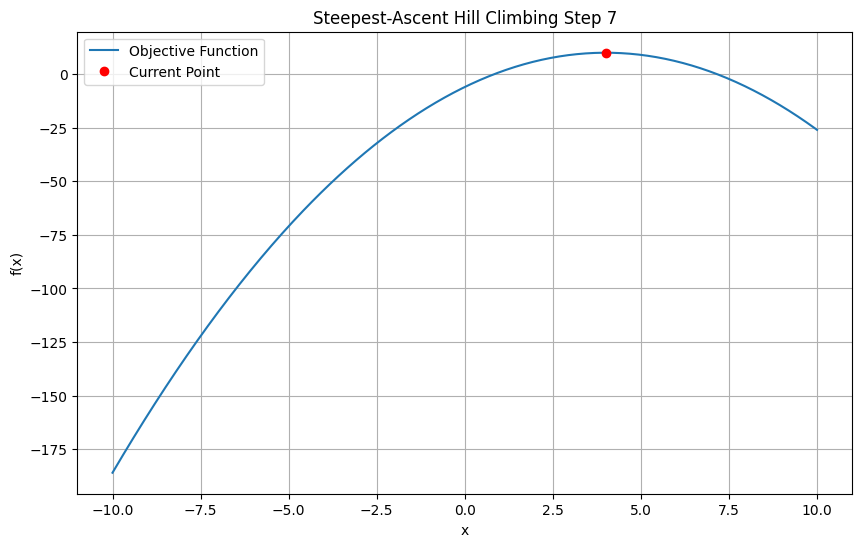

Steps taken by the Steepest-Ascent Hill Climbing algorithm: [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def objective_function(x):
    return -(x - 4)**2 + 10

# Steepest-Ascent Hill Climbing Algorithm
def steepest_ascent_hill_climbing(init_x, step_size, max_iter):
    x = init_x
    points = [x]

    for iteration in range(max_iter):
        current_val = objective_function(x)
        neighbors = [x - step_size, x + step_size]
        neighbor_vals = [objective_function(n) for n in neighbors]

        best_neighbor_idx = np.argmax(neighbor_vals)
        best_neighbor = neighbors[best_neighbor_idx]
        best_val = neighbor_vals[best_neighbor_idx]

        if best_val > current_val:
            x = best_neighbor
            points.append(x)
            # Visualize the current step
            visualize_step(points, iteration)
        else:
            break

    return points

# Visualization function
def visualize_step(points, iteration):
    x_vals = np.linspace(-10, 10, 400)
    y_vals = objective_function(x_vals)
    current_x = points[-1]
    current_y = objective_function(current_x)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Objective Function')
    plt.plot(current_x, current_y, 'ro', label='Current Point')
    plt.title(f'Steepest-Ascent Hill Climbing Step {iteration}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Initial parameters
init_x = 0
step_size = 0.5
max_iter = 100

# Running the Steepest-Ascent Hill Climbing algorithm
points = steepest_ascent_hill_climbing(init_x, step_size, max_iter)
print("Steps taken by the Steepest-Ascent Hill Climbing algorithm:", points)

## 3. Stochastic Hill Climbing

### Approach:
1. Start with an initial solution (current node).
2. Select a random neighbor of the current node.
3. Evaluate the neighbor:
   - If the neighbor improves the objective function, move to this neighbor and make it the current node.
   - If not, decide whether to move based on some probability or explore another random neighbor.
4. Repeat steps 2-3 for a specified number of iterations or until improvement stops.
5. Return the current node as the solution.

### Example:
Optimizing $ f(x) = - (x-4)^2 + 10 $ using stochastic hill climbing.

### Step-by-Step:
1. Start at $ x = 0 $.
2. Select a random neighbor, e.g., $ x = 3 $.
3. $ f(3) = 9 $, better than $ f(0) = -6 $. Move to $ x = 3 $.
4. Select another random neighbor, e.g., $ x = 2 $.
5. $ f(2) = 6 $, less than $ f(3) = 9 $. Based on probability, decide whether to move or not.
6. Continue the process until reaching $ x = 4 $ or a maximum number of iterations.


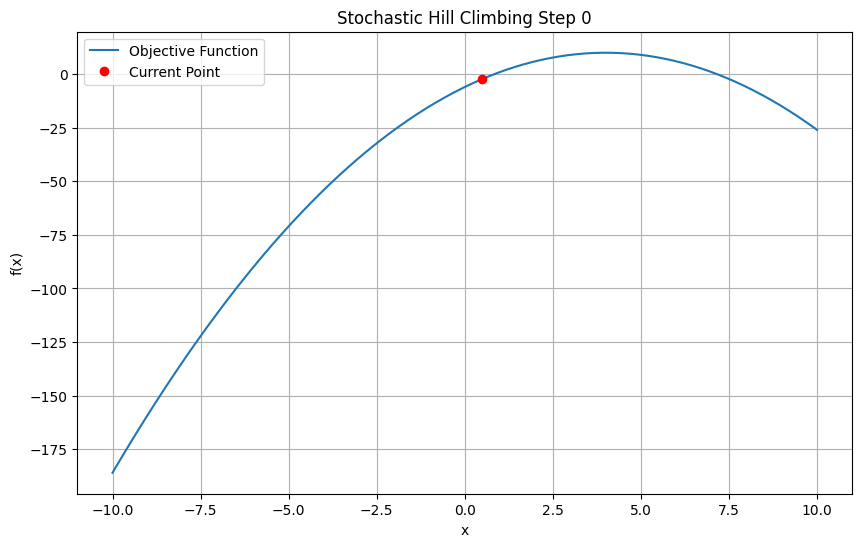

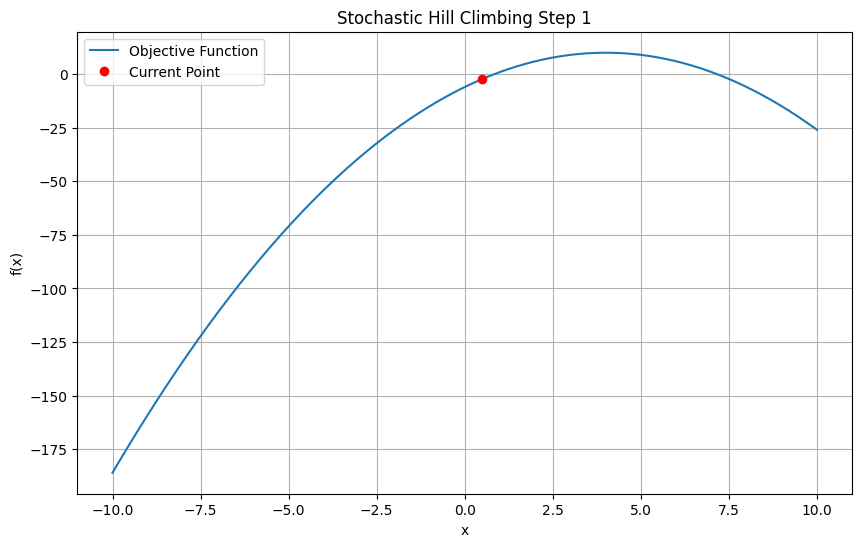

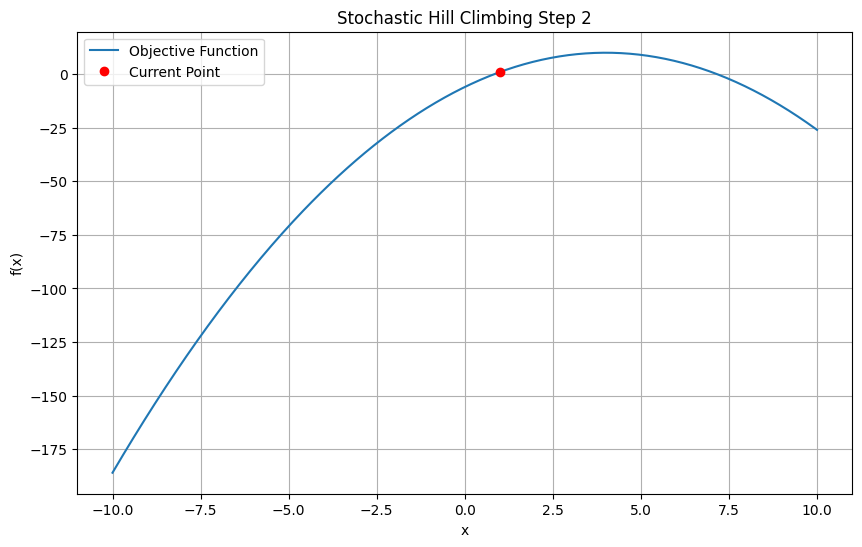

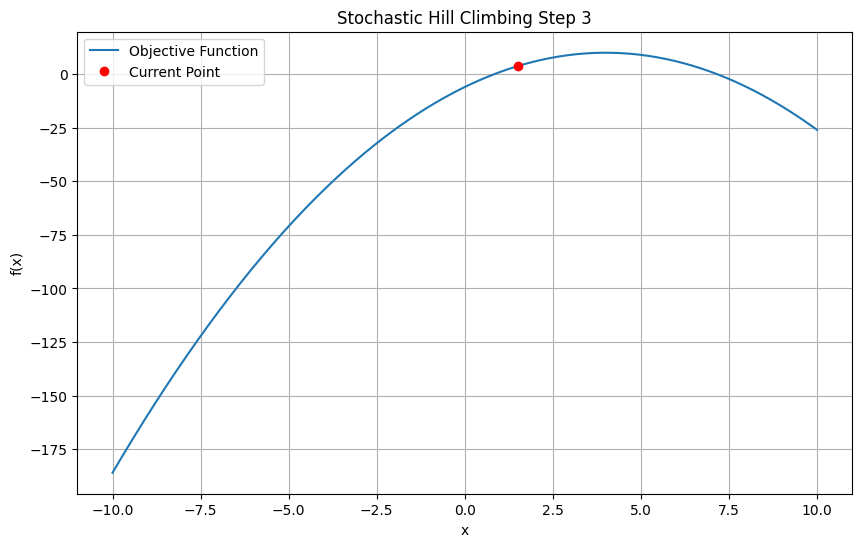

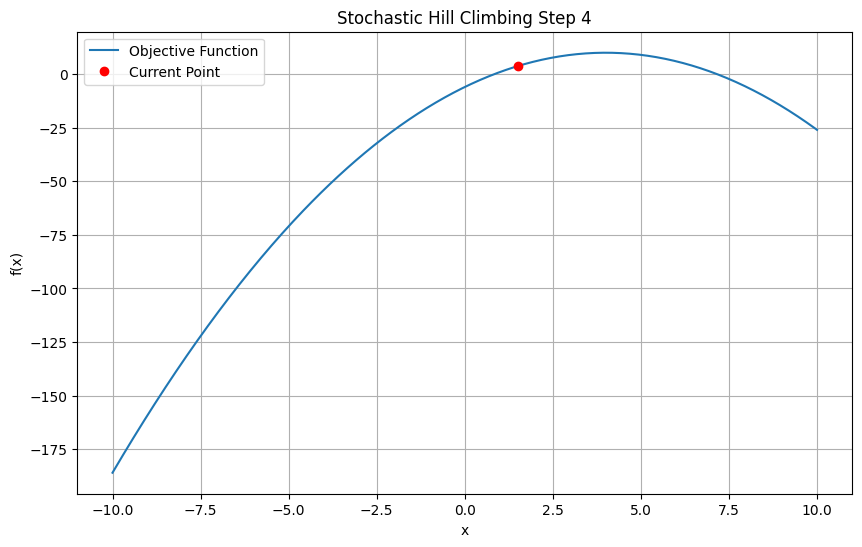

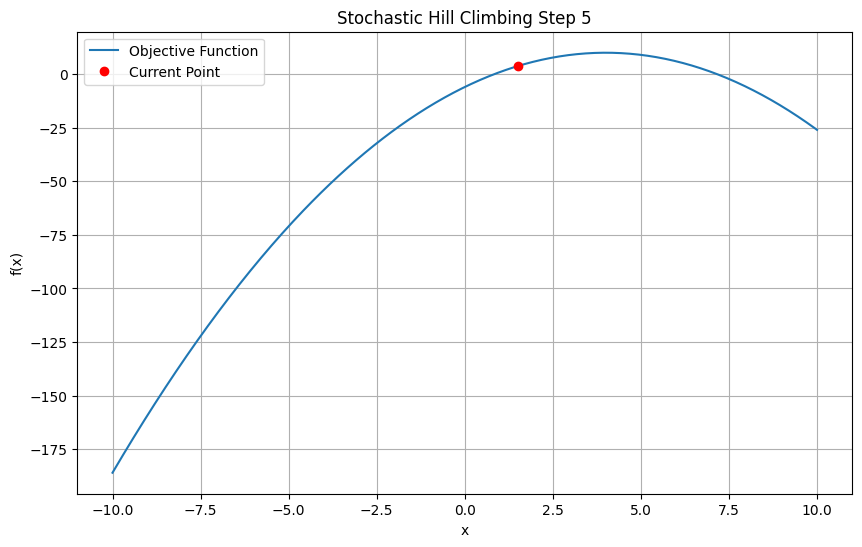

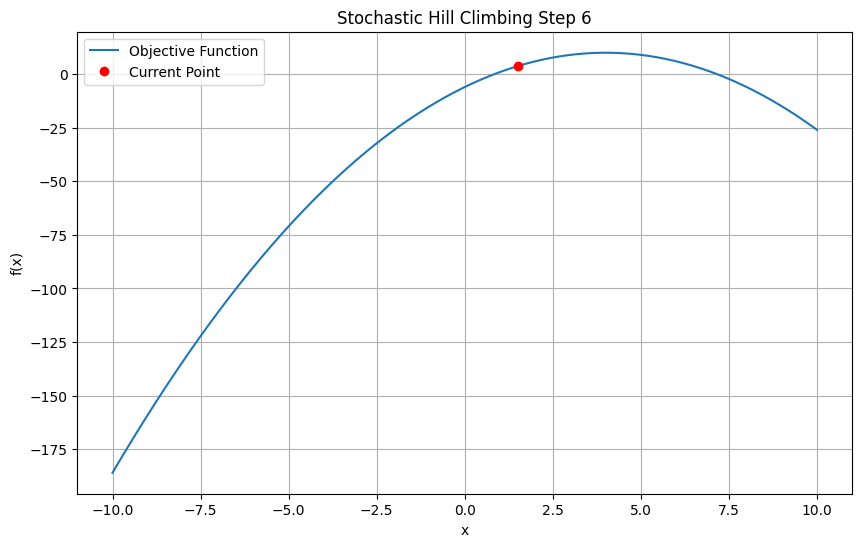

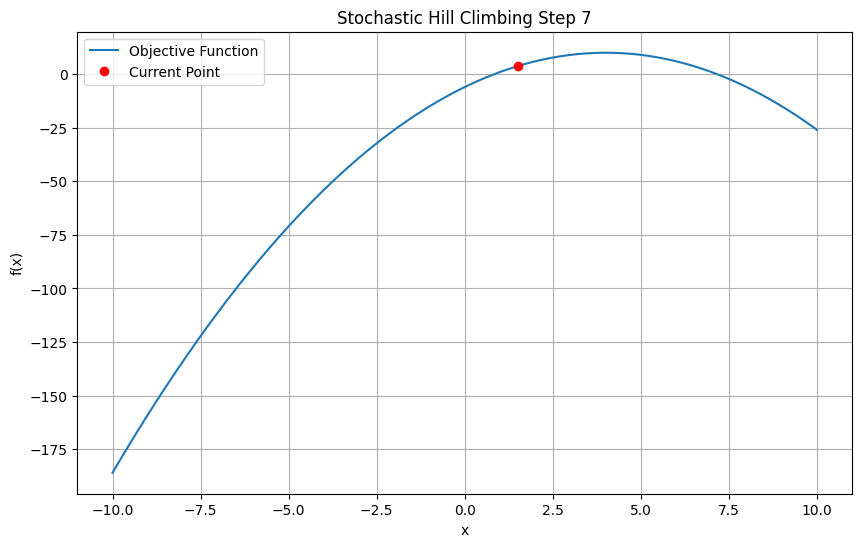

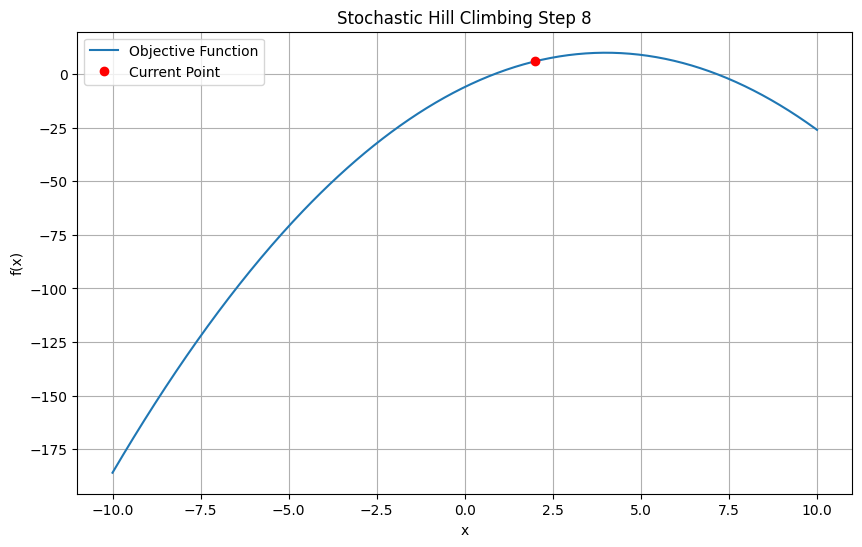

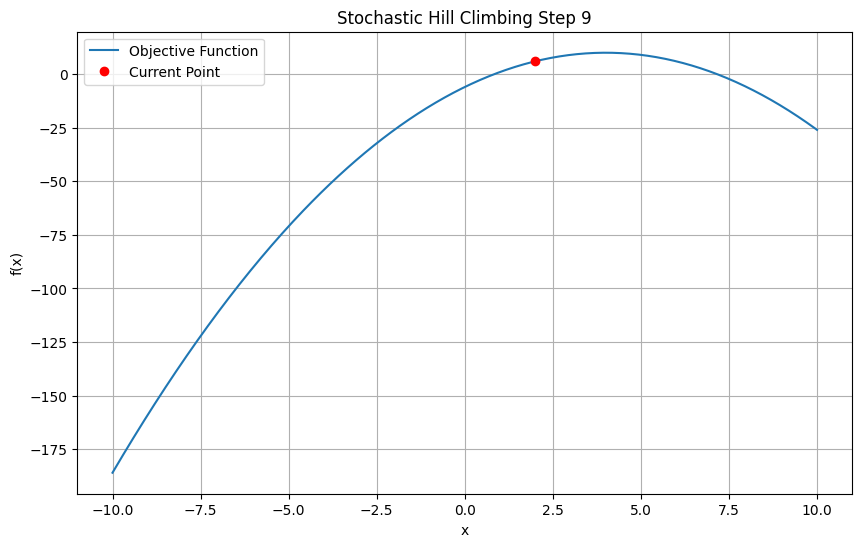

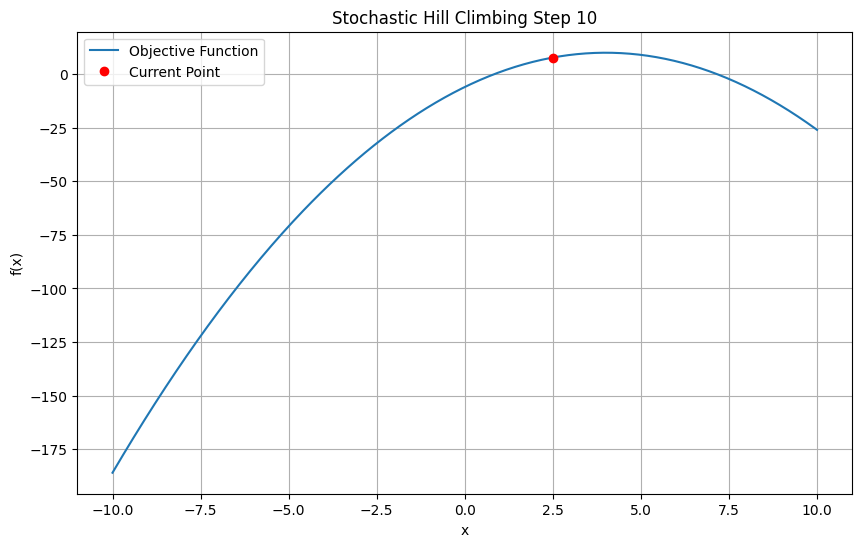

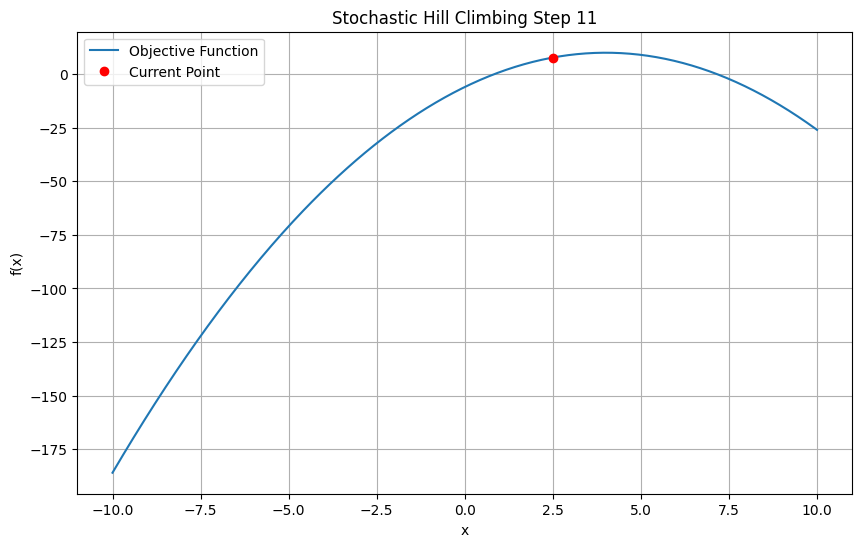

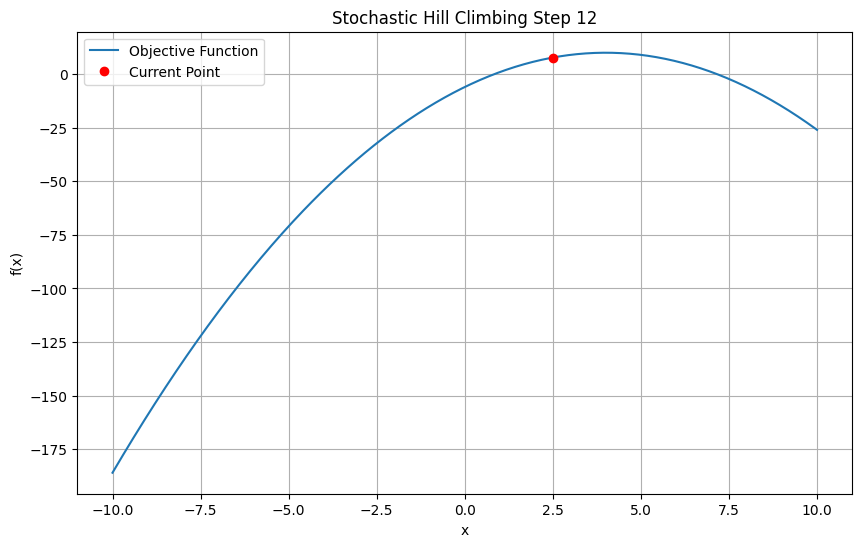

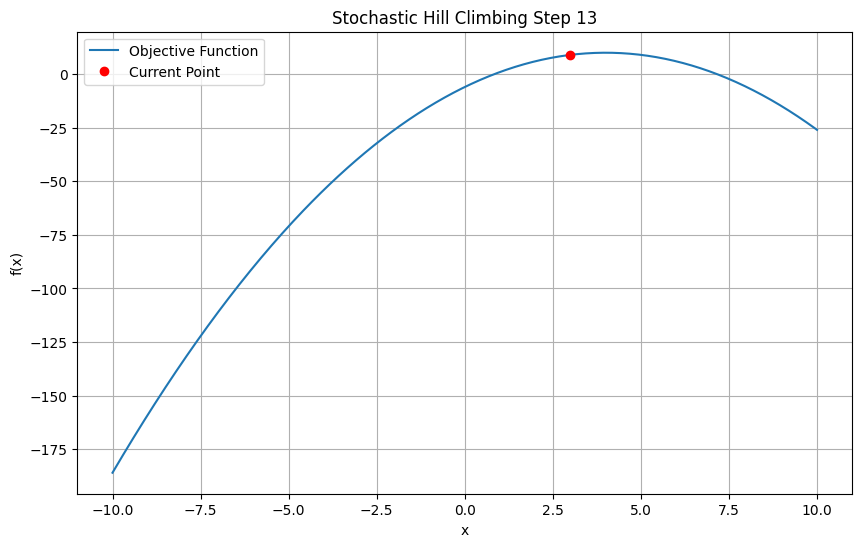

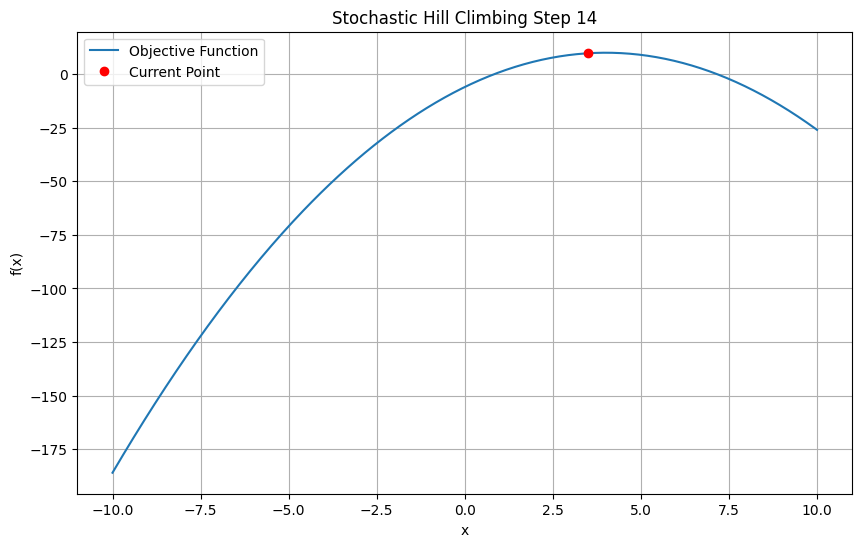

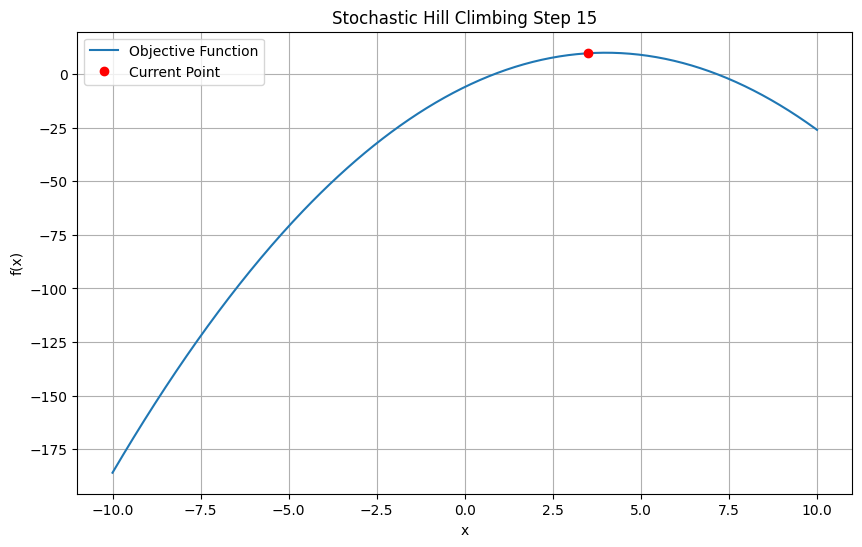

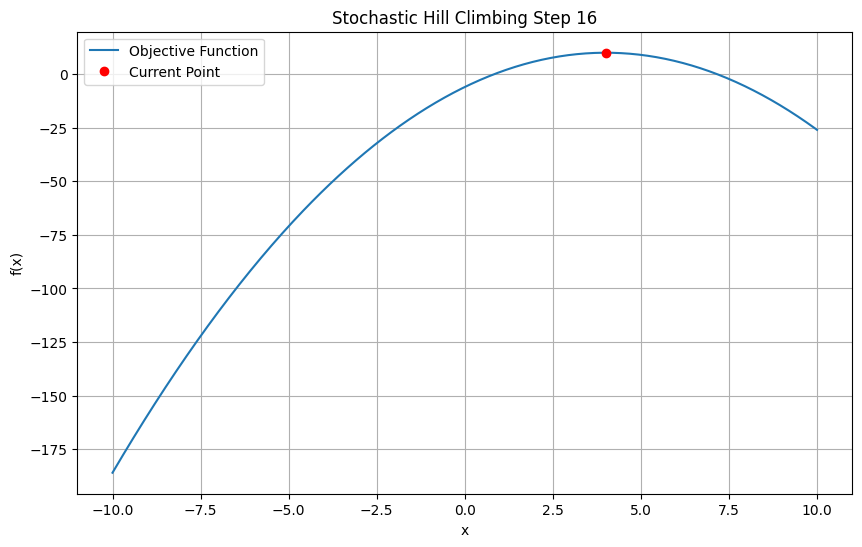

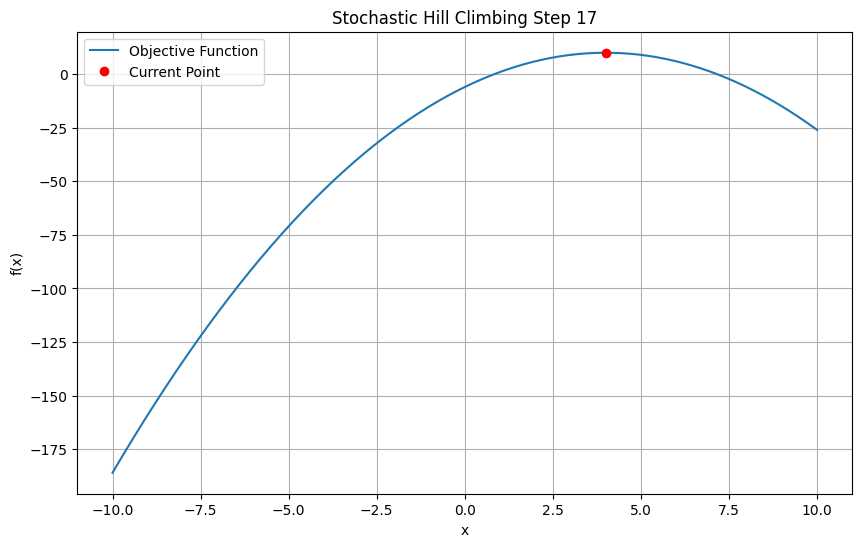

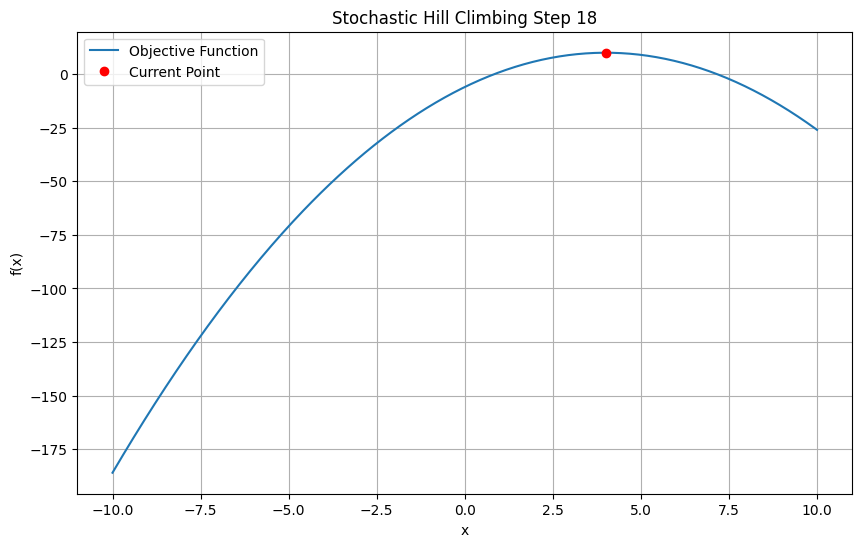

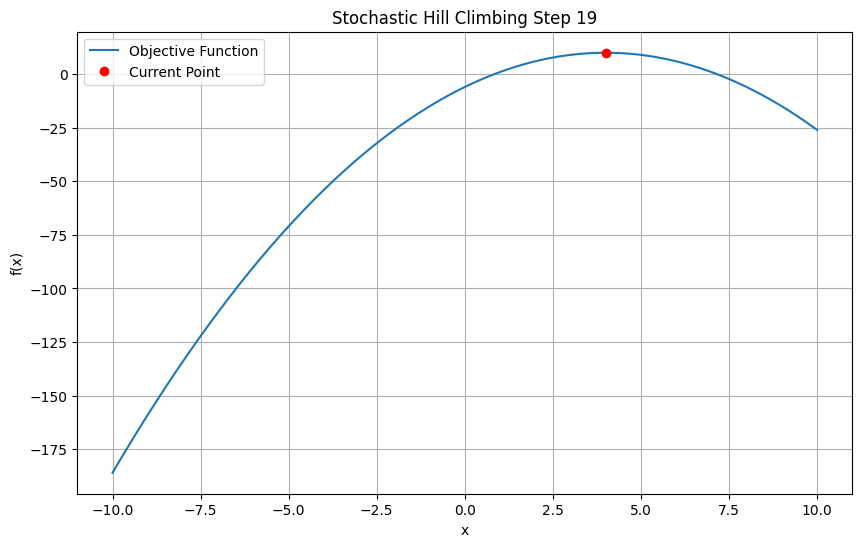

Steps taken by the Stochastic Hill Climbing algorithm: [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def objective_function(x):
    return -(x - 4)**2 + 10

# Stochastic Hill Climbing Algorithm
def stochastic_hill_climbing(init_x, step_size, max_iter):
    x = init_x
    points = [x]

    for iteration in range(max_iter):
        current_val = objective_function(x)

        # Select a random neighbor
        step_direction = np.random.choice([-1, 1])
        next_x = x + step_direction * step_size
        next_val = objective_function(next_x)

        if next_val > current_val:
            x = next_x
            points.append(x)

        # Visualize the current step
        visualize_step(points, iteration)

    return points

# Visualization function
def visualize_step(points, iteration):
    x_vals = np.linspace(-10, 10, 400)
    y_vals = objective_function(x_vals)
    current_x = points[-1]
    current_y = objective_function(current_x)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Objective Function')
    plt.plot(current_x, current_y, 'ro', label='Current Point')
    plt.title(f'Stochastic Hill Climbing Step {iteration}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Initial parameters
init_x = 0
step_size = 0.5
max_iter = 20

# Running the Stochastic Hill Climbing algorithm
points = stochastic_hill_climbing(init_x, step_size, max_iter)
print("Steps taken by the Stochastic Hill Climbing algorithm:", points)

## 4. Random-Restart Hill Climbing

### Approach:
1. Repeat the following until a satisfactory solution is found:
   - Start with a random initial solution.
   - Use the simple hill climbing algorithm to find a local optimum.
   - If stuck in a local optimum, restart with a new random initial solution.
2. Return the best solution found after several attempts.

### Example:
Optimizing $ f(x) = - (x-4)^2 + 10 $ with random-restart hill climbing.

### Step-by-Step:
1. Random restart at $ x = 2 $, find local maximum $ x = 4 $.
2. If another restart is needed, random restart at $ x = -3 $, find local maximum $ x = 4 $.
3. Continue restarts until $ x = 4 $ is consistently identified as the global maximum.

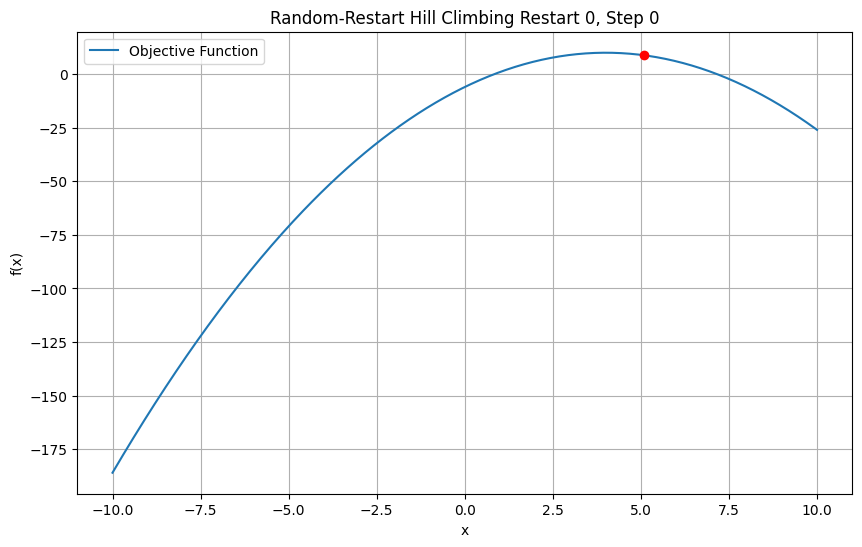

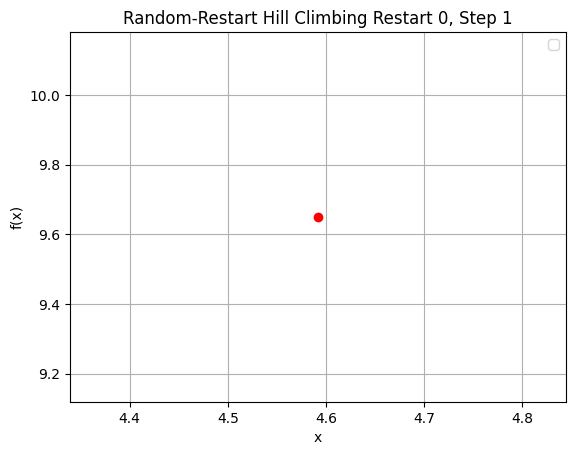

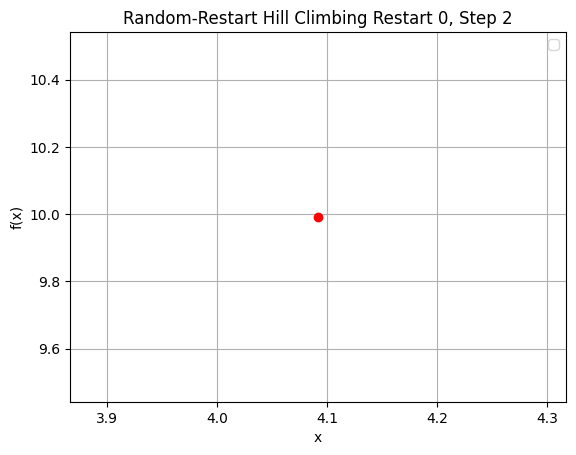

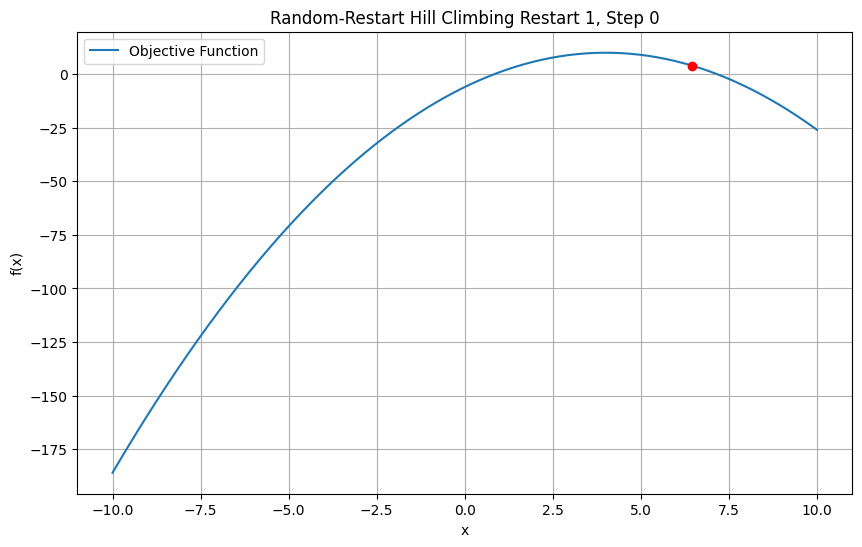

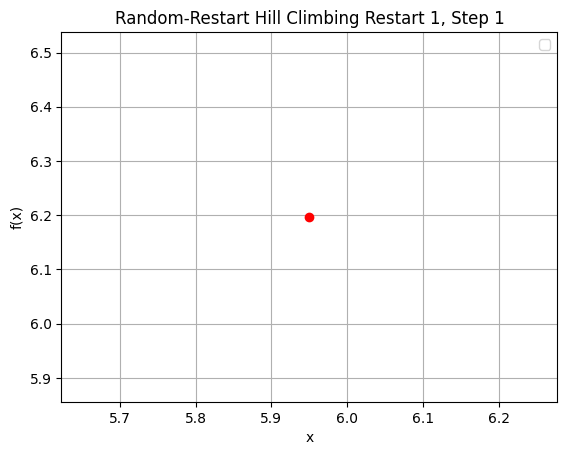

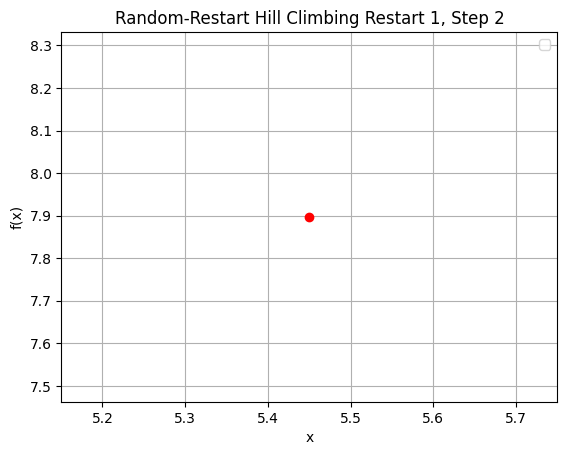

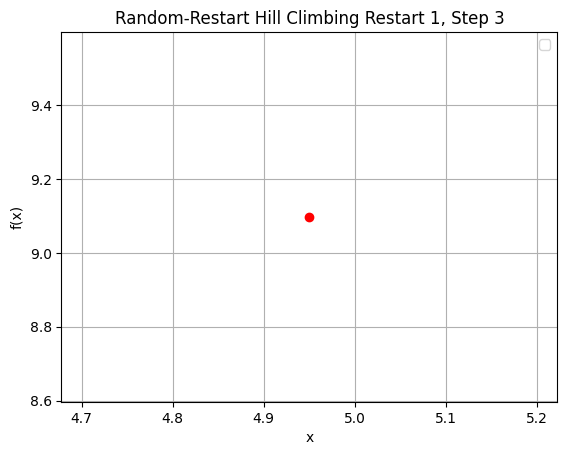

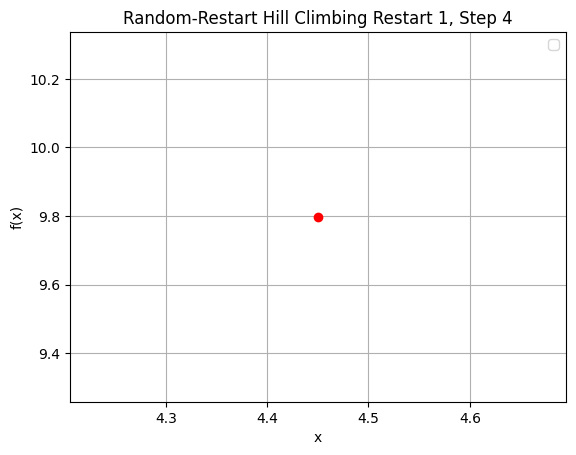

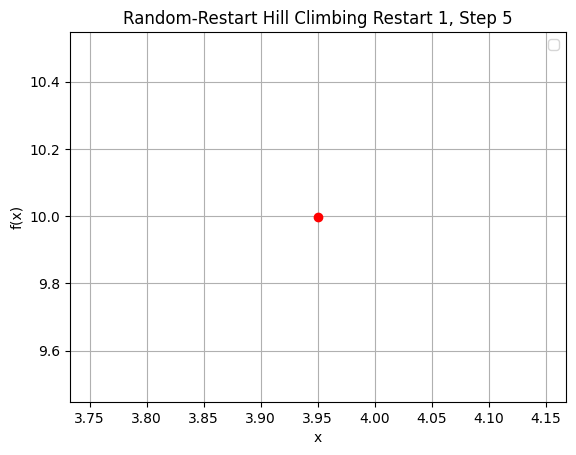

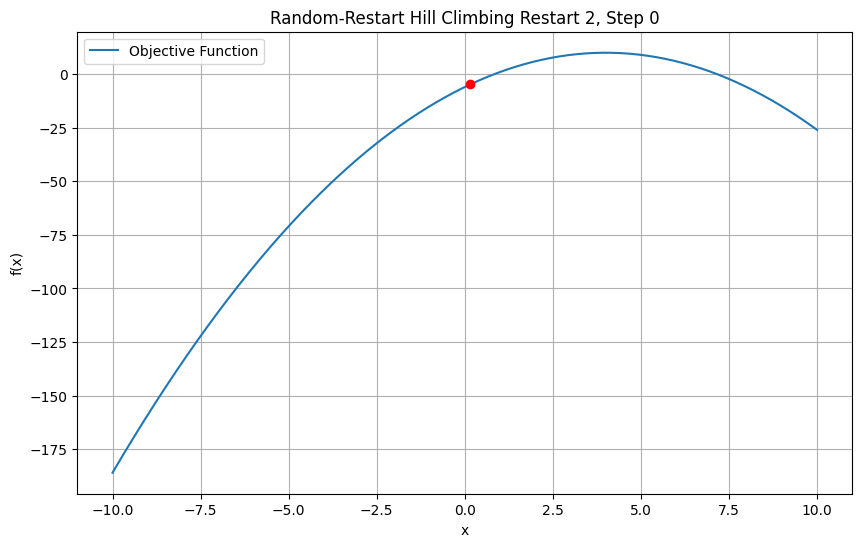

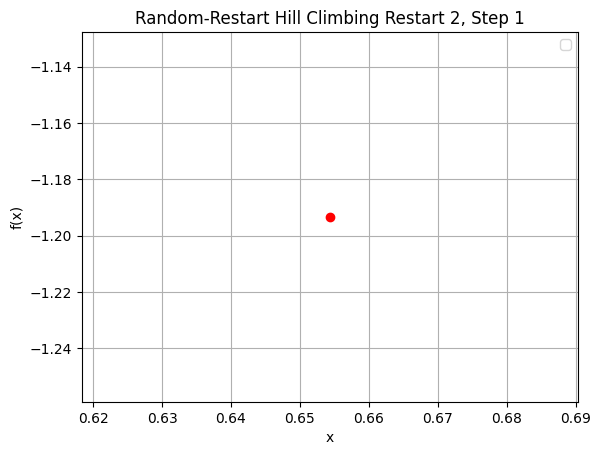

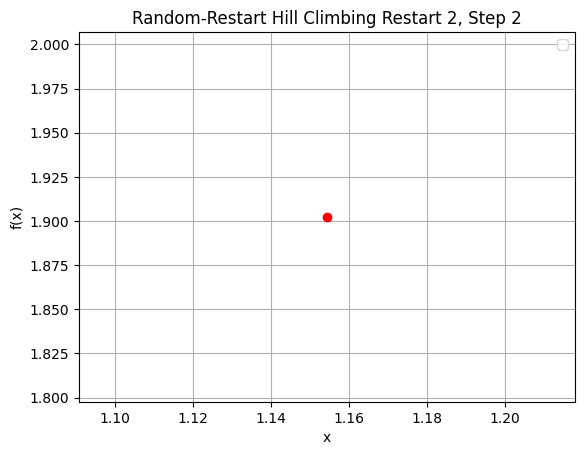

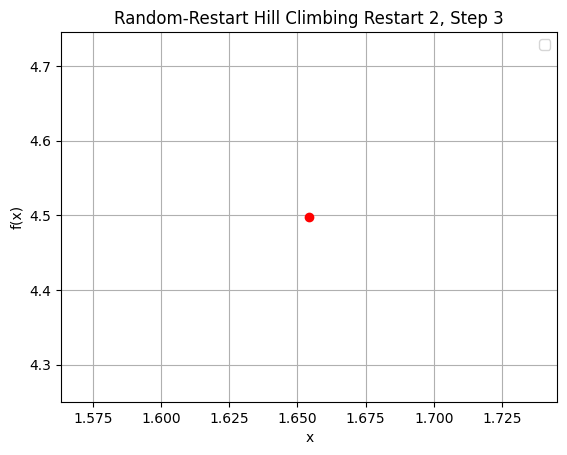

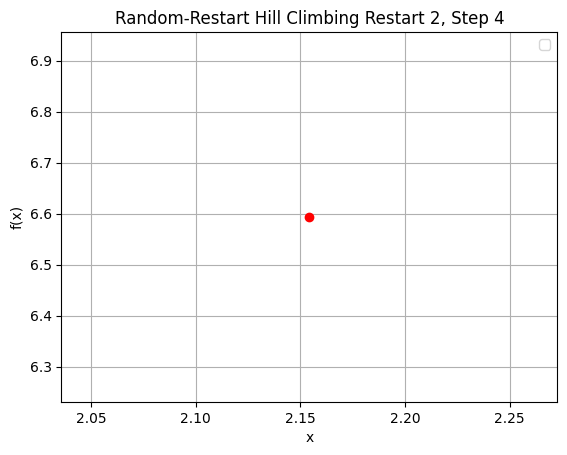

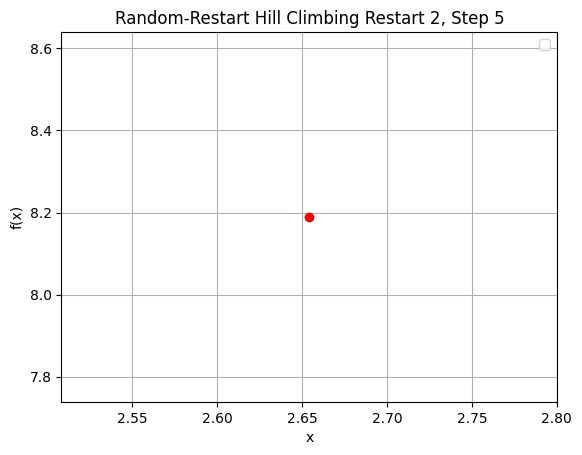

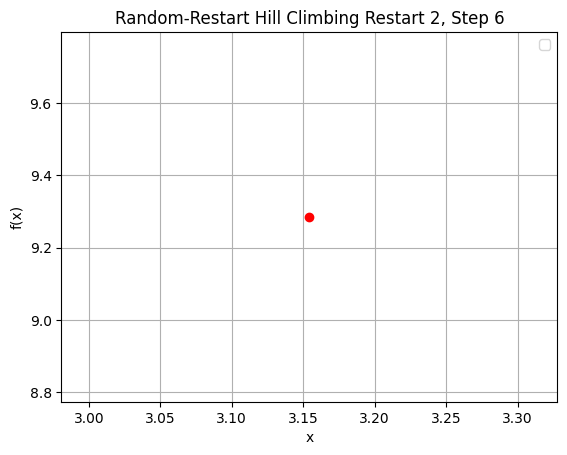

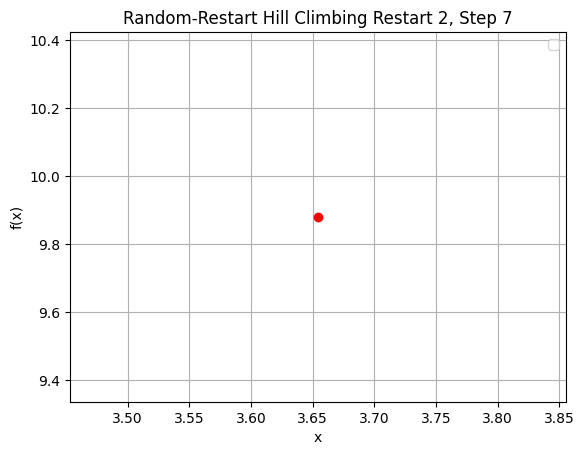

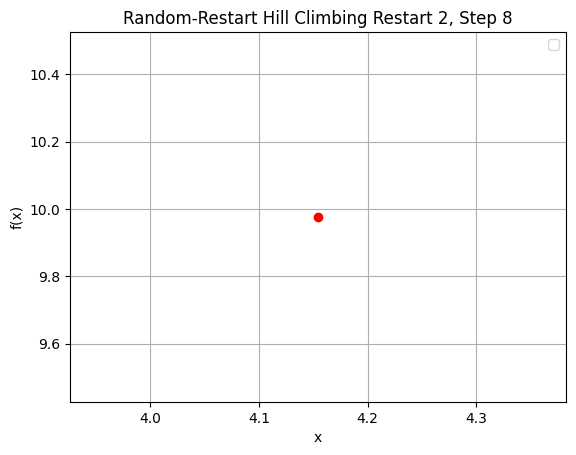

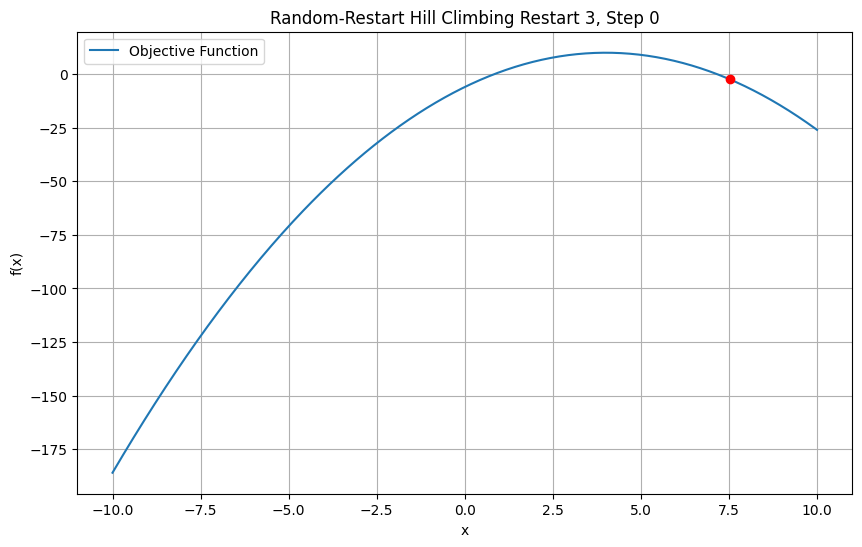

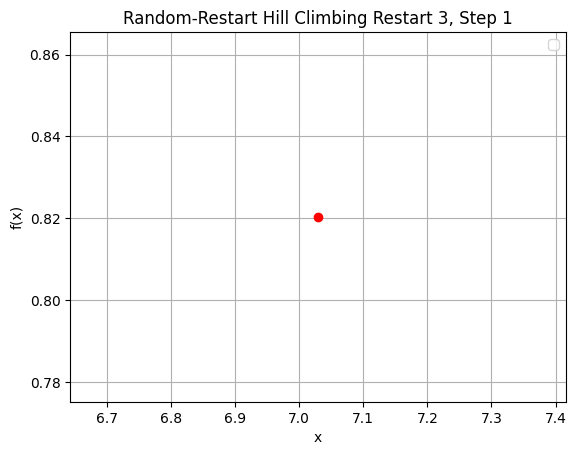

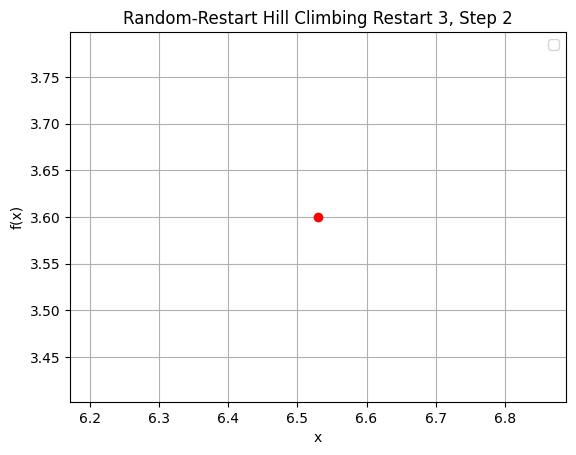

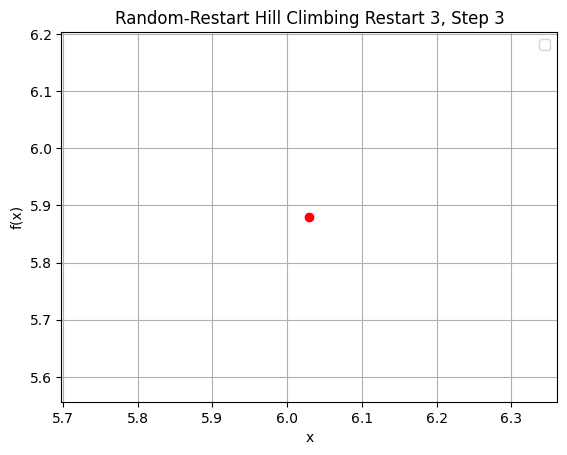

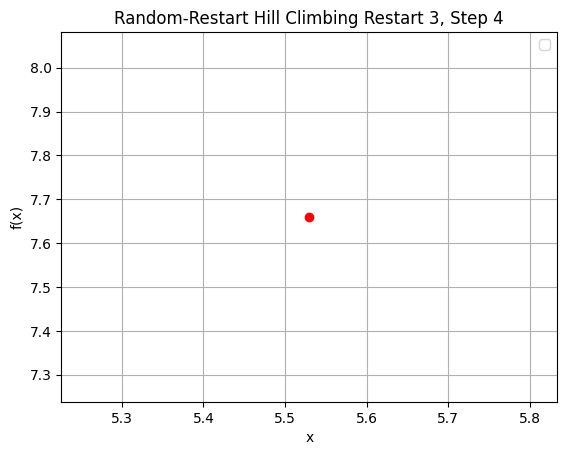

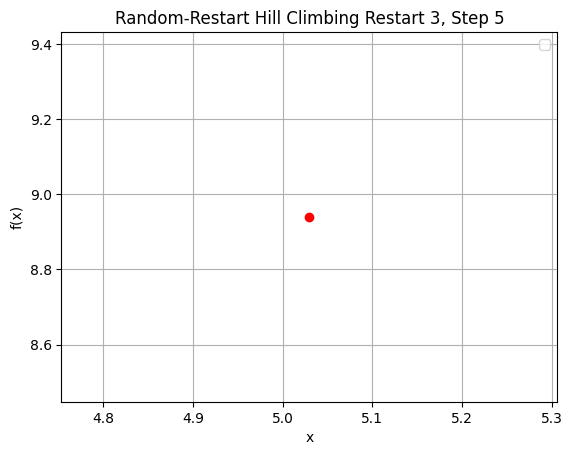

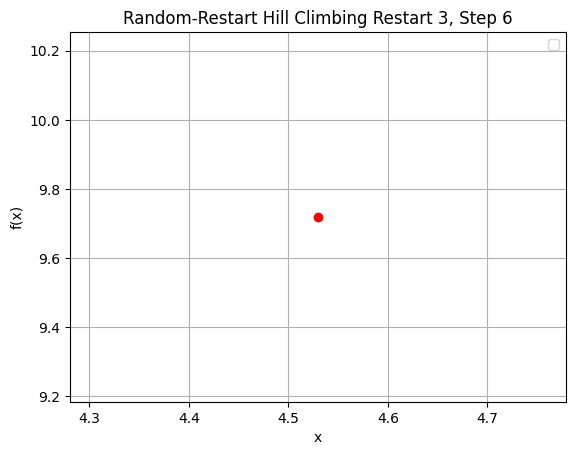

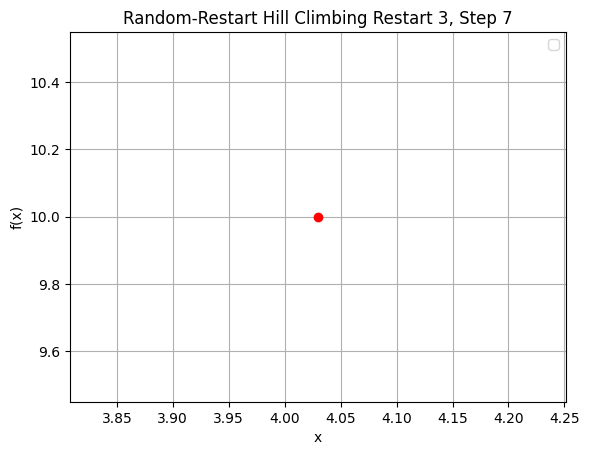

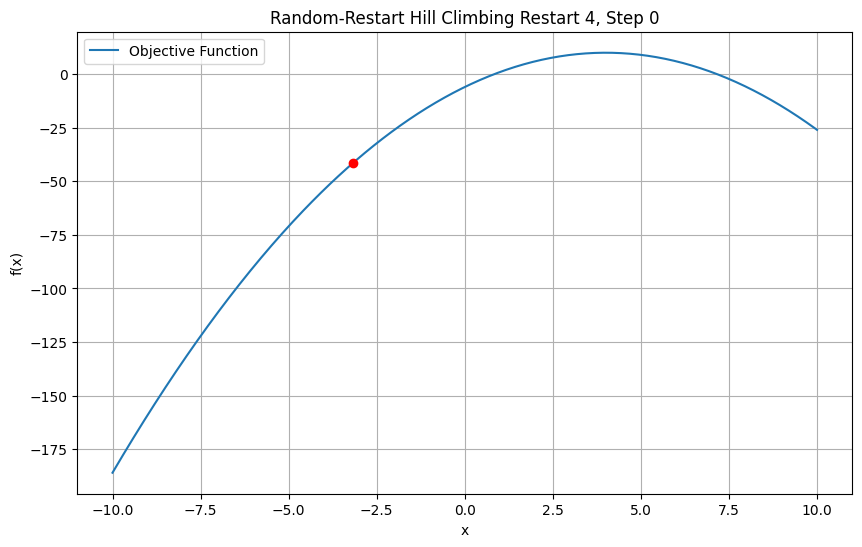

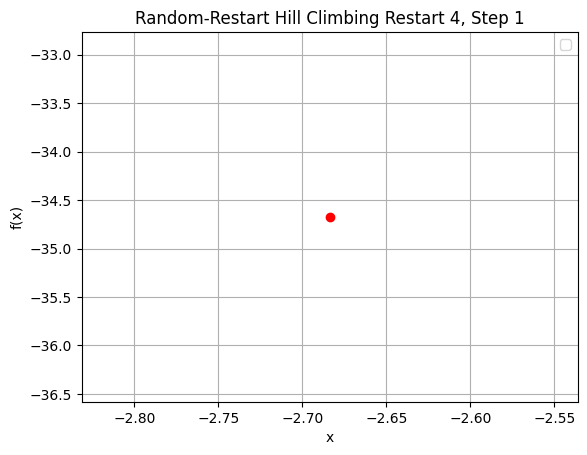

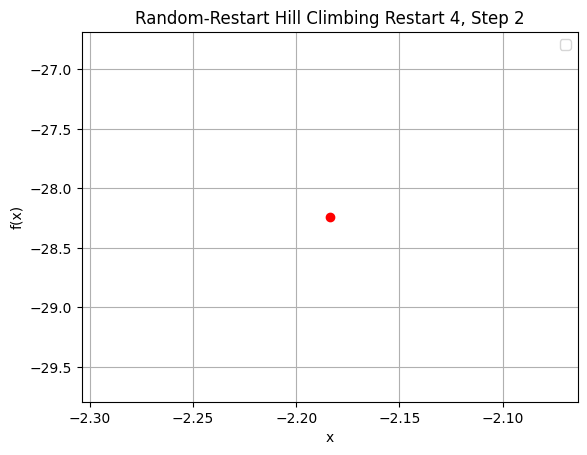

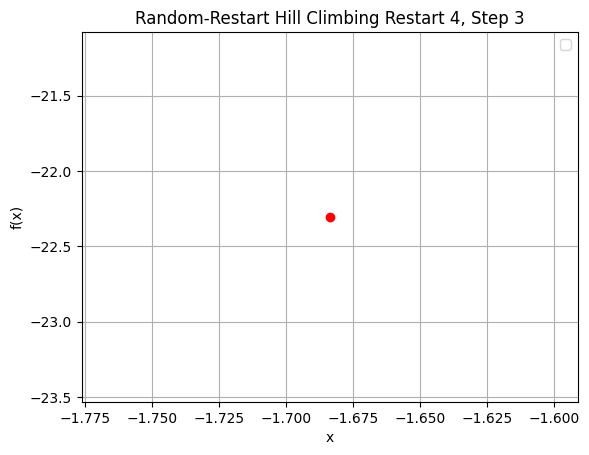

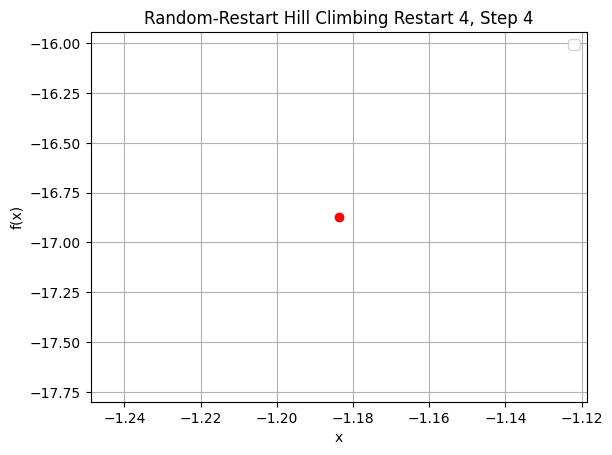

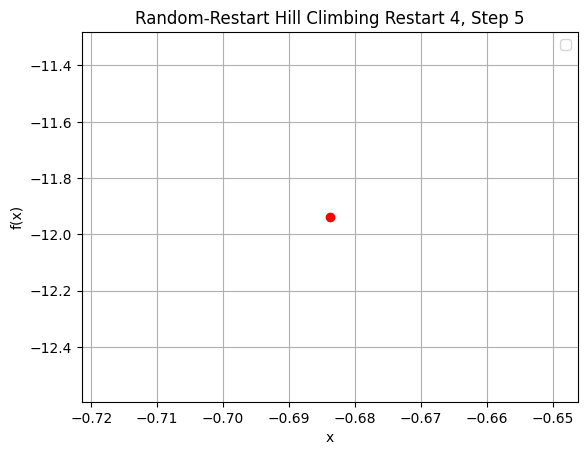

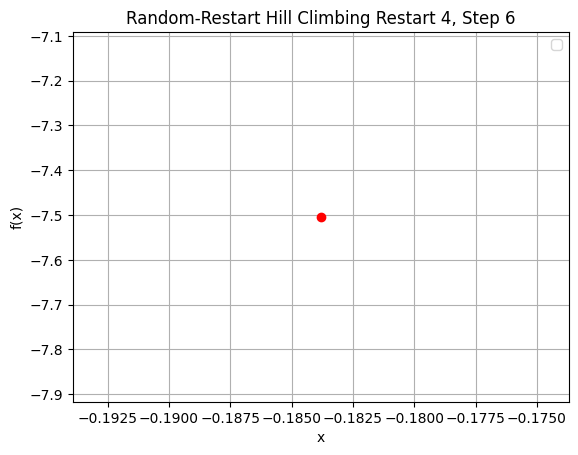

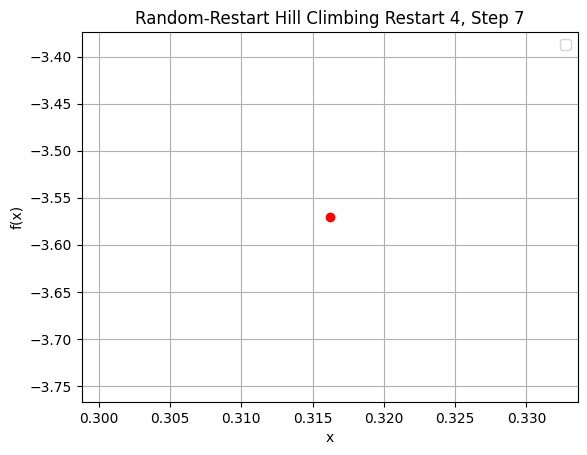

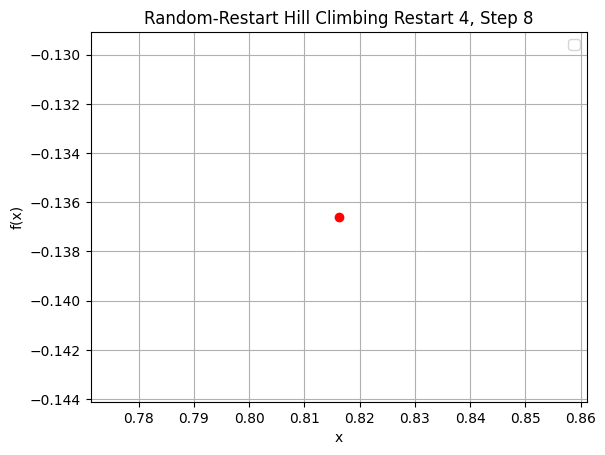

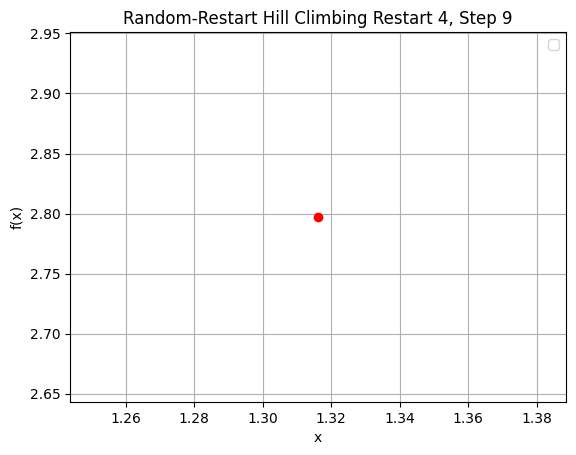

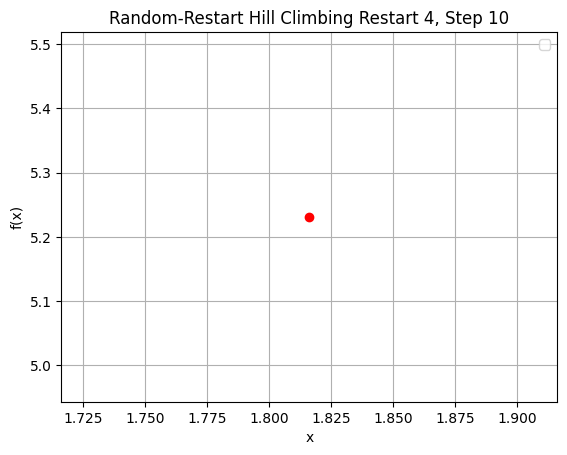

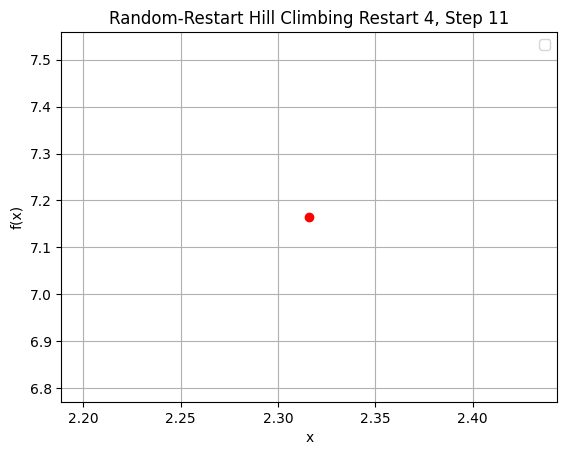

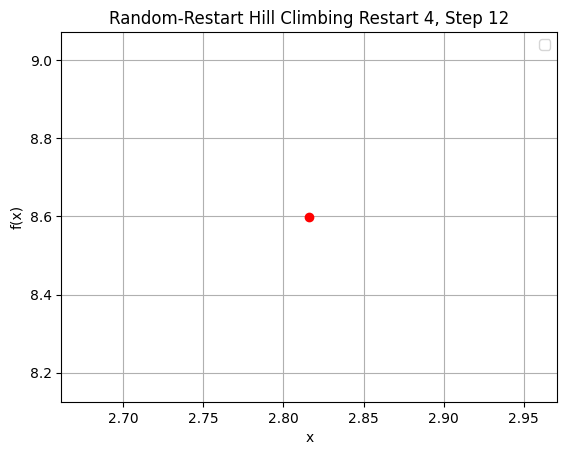

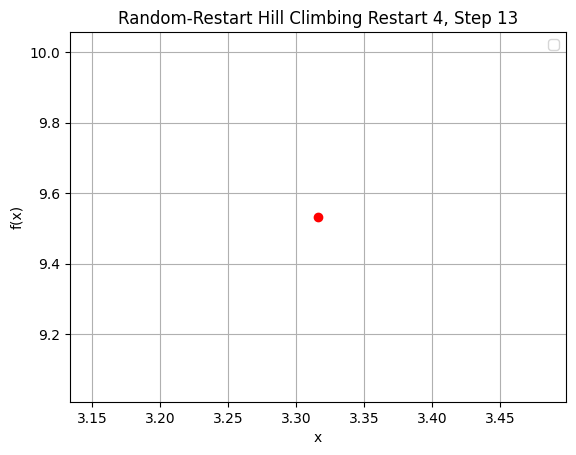

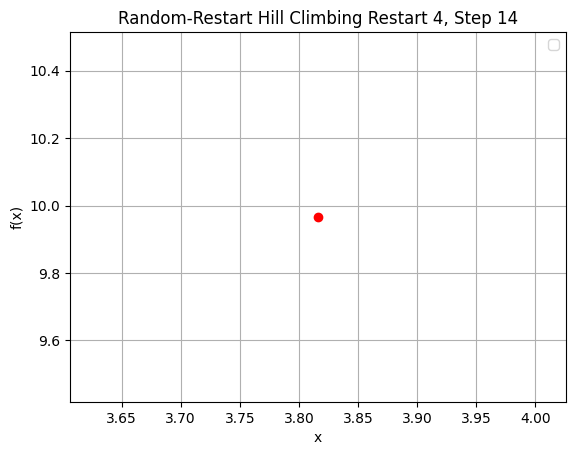

Best solution found by Random-Restart Hill Climbing: 4.029793309973421
Steps taken by the Random-Restart Hill Climbing algorithm: [5.0918673352001935, 4.5918673352001935, 4.0918673352001935, 6.450189148911495, 5.950189148911495, 5.450189148911495, 4.950189148911495, 4.450189148911495, 3.9501891489114946, 0.154353518724049, 0.654353518724049, 1.154353518724049, 1.654353518724049, 2.154353518724049, 2.654353518724049, 3.154353518724049, 3.654353518724049, 4.154353518724049, 7.529793309973421, 7.029793309973421, 6.529793309973421, 6.029793309973421, 5.529793309973421, 5.029793309973421, 4.529793309973421, 4.029793309973421, -3.18380233056131, -2.68380233056131, -2.18380233056131, -1.68380233056131, -1.18380233056131, -0.6838023305613099, -0.1838023305613099, 0.3161976694386901, 0.8161976694386901, 1.31619766943869, 1.81619766943869, 2.31619766943869, 2.81619766943869, 3.31619766943869, 3.81619766943869]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def objective_function(x):
    return -(x - 4)**2 + 10

# Simple Hill Climbing Algorithm (used in Random-Restart)
def simple_hill_climbing(init_x, step_size, max_iter):
    x = init_x
    points = [x]
    for iteration in range(max_iter):
        current_val = objective_function(x)
        next_x_forward = x + step_size
        next_x_backward = x - step_size
        next_val_forward = objective_function(next_x_forward)
        next_val_backward = objective_function(next_x_backward)

        if next_val_forward > current_val:
            x = next_x_forward
            points.append(x)
        elif next_val_backward > current_val:
            x = next_x_backward
            points.append(x)
        else:
            break
    return points

# Random-Restart Hill Climbing Algorithm
def random_restart_hill_climbing(step_size, max_iter, restarts):
    best_solution = None
    best_value = float('-inf')
    all_points = []

    for restart in range(restarts):
        init_x = np.random.uniform(-10, 10)  # Random initial solution
        points = simple_hill_climbing(init_x, step_size, max_iter)
        all_points.extend(points)

        current_value = objective_function(points[-1])
        if current_value > best_value:
            best_value = current_value
            best_solution = points[-1]

        # Visualize after each restart
        visualize_step(points, restart, init_x)

    return best_solution, all_points

# Visualization function
def visualize_step(points, restart, init_x):
    x_vals = np.linspace(-10, 10, 400)
    y_vals = objective_function(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='Objective Function')
    for i in range(len(points)):
        current_x = points[i]
        current_y = objective_function(current_x)
        plt.plot(current_x, current_y, 'ro')
        plt.title(f'Random-Restart Hill Climbing Restart {restart}, Step {i}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Initial parameters
step_size = 0.5
max_iter = 50
restarts = 5

# Running the Random-Restart Hill Climbing algorithm
best_solution, all_points = random_restart_hill_climbing(step_size, max_iter, restarts)
print("Best solution found by Random-Restart Hill Climbing:", best_solution)
print("Steps taken by the Random-Restart Hill Climbing algorithm:", all_points)